<a href="https://colab.research.google.com/github/aferoliv/Redox_titration/blob/main/Titula%C3%A7%C3%A3o_Redox_sem_Aproxima%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulação de Curva de Titulação Redox (sem aproximação)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
#from sympy.solvers.solveset import nonlinsolve


Condições da Titulação

In [ ]:
# constantes
S=59.16     # constante Nernstiana

# titulante
conc_N=0.15
Eo_N=219
ne_N=2
coef_N=2

#titulado
conc_A=0.01
Eo_A=675
ne_A=5
coef_A=1
Vo=25

Funções

f_ox e f_red: fração de equilíbrio redox

In [ ]:

def fredox(E,Eo,ne,coef,estado):
   Q=10**((Eo-E)*ne/S)
   if estado=="red":
      fr= Q/(Q+1)
   elif estado=="ox":
      fr= 1/(Q+1)
   else:
      print("estado?")
   return fr

def excesso(conc_N,coef_N,V,conc_A,coef_A, Vo):
   excesso=(coef_N*conc_N*V/1000-coef_A*conc_A*Vo)/(Vo+V/1000)
   return excesso



In [ ]:
incr=50
num_pontos=50
v_final=num_pontos*incr
estado_N="red"
if estado_N=="red":
   estado_A="ox"
else:
   estado_A="red"

In [ ]:
curva=[]
for V in range(0,v_final,incr) :
     excess=excesso(conc_N,coef_N,V,conc_A,coef_A, Vo)
     E=-2000
     E_incr=200
     i=0
     dif=1
     dif1=1 # inicialize dif1 com um valor diferente de zero para evitar divisão por zero na primeira iteração

     while  abs(dif)>1e-7:
        i=i+1
        E=E+E_incr
        #print(E,incr)
        eq_N=coef_N*fredox(E,Eo_N,ne_N,coef_N,estado_N)*conc_N*V/1000
        eq_A=coef_A*fredox(E,Eo_A, ne_A, coef_A, estado_A)*conc_A*Vo
        dif=(excess-(eq_N-eq_A))
        #
        #print(i, E,"razao",dif1*dif,"abs(dif)",abs(dif), eq_N,eq_A)
        #
        if (i==1):
          dif1=dif
        if (dif1*dif)<0:
           E_incr=-E_incr/2
        dif1=dif

        '''
        if (dif==0):
          dif=1e-15
        if (i==200 or E>2000):
          print("não convergiu")
          dif=1e-15
        '''
     #print("volume", V,"E calc",E,"iterações",i,"excesso",excess)
     ponto=V,E,i,excess
     curva.append(ponto)
curva_colab=pd.DataFrame(curva)
curva_colab.to_excel("curva-colab.xlsx")

print(curva_colab)
     #A=nonlinsolve([excess-(coef_N*fredox(E,Eo_N,ne_N,coef_N,estado_N)*conc_N*V/1000-coef_A*fredox(E,Eo_A, ne_A, coef_A, estado_A))/(Vo+V/1000)],[E])
     #print(A)



       0           1   2         3
0      0  658.669376  45 -0.010000
1    100  657.965565  42 -0.008765
2    200  657.165718  44 -0.007540
3    300  656.236649  42 -0.006324
4    400  655.124092  44 -0.005118
5    500  653.730583  46 -0.003922
6    600  651.853180  43 -0.002734
7    700  648.932648  37 -0.001556
8    800  641.766357  40 -0.000388
9    900  294.204712  37  0.000772
10  1000  283.790588  37  0.001923
11  1100  278.988647  37  0.003065
12  1200  276.033783  40  0.004198
13  1300  273.986816  33  0.005323
14  1400  272.471619  39  0.006439
15  1500  271.299744  39  0.007547
16  1600  270.365715  44  0.008647
17  1700  269.603539  44  0.009738
18  1800  268.970680  44  0.010821
19  1900  268.437576  42  0.011896
20  2000  267.983246  42  0.012963
21  2100  267.592621  40  0.014022
22  2200  267.253685  45  0.015074
23  2300  266.957855  42  0.016117
24  2400  266.698074  45  0.017153
25  2500  266.469002  47  0.018182
26  2600  266.265965  46  0.019203
27  2700  266.085434

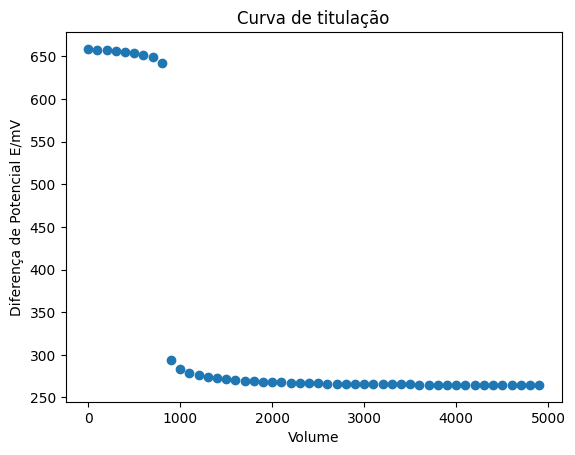

In [ ]:
x=curva_colab[0]
y=curva_colab[1]
Xlabel="Volume"
Ylabel="Diferença de Potencial E/mV"
plt.title("Curva de titulação")
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.scatter(x,y)
plt.show()

Grafico da fração de equilíbrio

In [ ]:
alfa_N_ox=fredox(E,Eo_N,ne_N,coef_N,estado_N)
alfa_A_ox=fredox(E,Eo_A, ne_A, coef_A, estado_A)
alfa_N_red=1-alfa_N_ox
alfa_A_red=1-alfa_A_ox
print(alfa_N_ox,alfa_A_ox,alfa_N_red,alfa_A_red)

0.027756963603099788 2.096300127436579e-35 0.9722430363969002 1.0


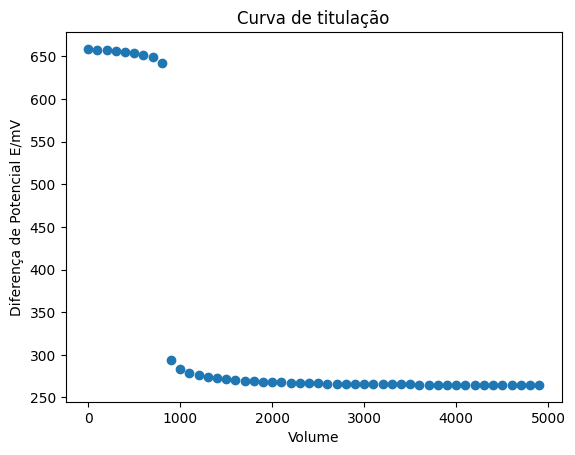

In [ ]:
x=curva_colab[0]
y=curva_colab[1]
Xlabel="Volume"
Ylabel="Diferença de Potencial E/mV"
plt.title("Curva de titulação")
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.scatter(x,y)
plt.show()